# Face Varification system by using FaceNet model

we are building a face varification system for an office building where the building manager would like to offer facial recognition to allow the employees to enter the building.


First we gives list of people to the model varify. To be admitted, each person has to swipe an identification card at the entrance. The face recognition system then verifies that they are who they claim to be.

<a name='1'></a>
## 1 - Packages

In [10]:
import os
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL

%matplotlib inline


<a name='2'></a>
## 2 - Encoding Face Images into a 128-Dimensional Vector by using pretrained faceNet model

<a name='3'></a>
###  Load pretrained model and weights

In [11]:
from tensorflow.keras.models import model_from_json

json_file = open('keras-facenet-h5/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

model.load_weights('keras-facenet-h5/model.h5')

In [12]:
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/batchnorm_1/add_1:0' shape=(None, 128) dtype=float32>]


In [13]:
FRmodel = model

<a name='3'></a>
##  3 - Create a databse as a python dictionary
Now you'll build a database containing one encoding vector for each person who is allowed to enter the office. This database maps each person's name to a 128-dimensional encoding of their face.

In [14]:
def img_to_encoding(image_path, model):
    img1 = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img1) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return {"encoded":embedding / np.linalg.norm(embedding, ord=2),"image":img1}

In [15]:
database = {}
database["Danielle"] = img_to_encoding("images/danielle.png", FRmodel)
database["Younes"] = img_to_encoding("images/younes.jpg", FRmodel)
database["Tian"] = img_to_encoding("images/tian.jpg", FRmodel)
database["Andrew"] = img_to_encoding("images/andrew.jpg", FRmodel)
database["Kian"] = img_to_encoding("images/kian.jpg", FRmodel)
database["Dan"] = img_to_encoding("images/dan.jpg", FRmodel)
database["Sebastiano"] = img_to_encoding("images/sebastiano.jpg", FRmodel)
database["Bertrand"] = img_to_encoding("images/bertrand.jpg", FRmodel)
database["Kevin"] = img_to_encoding("images/kevin.jpg", FRmodel)
database["Felix"] = img_to_encoding("images/felix.jpg", FRmodel)
database["Benoit"] = img_to_encoding("images/benoit.jpg", FRmodel)
database["Arnaud"] = img_to_encoding("images/arnaud.jpg", FRmodel)
database["Salman"] = img_to_encoding("images/Salman.jpg", FRmodel)
database["Sonalika"] = img_to_encoding("images/Sonalika.jpg", FRmodel)
database["Syam1"] = img_to_encoding("images/syam1.jpg", FRmodel)
database["Anita"] = img_to_encoding("images/Anita.jpg", FRmodel)


<a name='4'></a>
## 4 - Function For Varification

In [16]:
def verify(image_path, identity, database, model):

    encoding = img_to_encoding(image_path, model)
    
    # Compute distance with identity's image 
    dist = np.linalg.norm(tf.subtract(database[identity]["encoded"],encoding["encoded"]))
    print("we find the distance:" +str(dist))
    if dist<0.7:
        print("Hello! " + str(identity) + ", Please, Welcome in!")
        door_open = True
    else:
        print("You are not " + str(identity) + ", please go away from here....")
        door_open = False
   
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(database[identity]["image"])
    plt.axis('off')
    plt.title("Image in Database")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(encoding["image"])
    plt.axis('off')
    plt.title("Your Image")
           
    return dist, door_open

<a name='5'></a>
## 5 - Test with your image

we find the distance:1.3801143
You are not Bertrand, please go away from here....


(1.3801143, False)

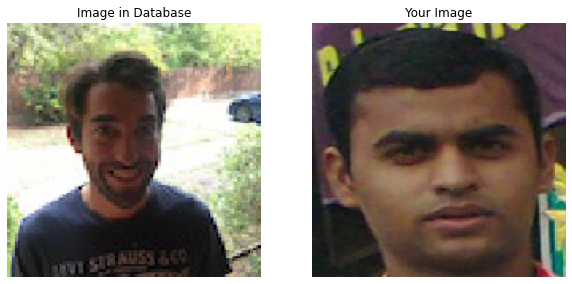

In [17]:
verify("images/Salman1.jpg", "Bertrand", database, FRmodel)

we find the distance:0.5436483
Hello! Bertrand, Please, Welcome in!


(0.5436483, True)

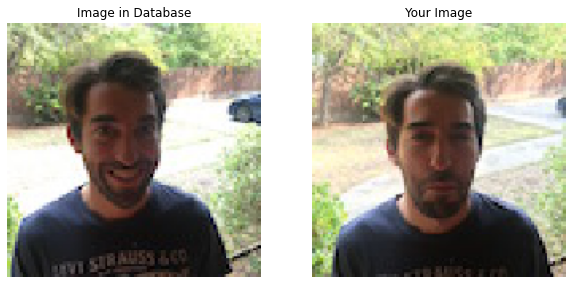

In [18]:
verify("images/camera_1.jpg", "Bertrand", database, FRmodel)